In [1]:
### Import libraries
import netCDF4
import numpy as np        
import matplotlib as mpl    
import matplotlib.mlab as mlab      
import matplotlib.pyplot as plt     # For plotting
import matplotlib.dates as mdates   # For formatting dates when plotting
import xarray as xr                 # For dealing with netCDF data
import cartopy.crs as ccrs          # For plotting maps
import cartopy.feature as cfeature  # For plotting maps
import pandas as pd                 # A quick way to deal with time stamps

from netCDF4 import Dataset

print('testing')

testing


In [3]:
### Read in data
WRF_DIRECTORY = '/projects/jiko1138/ATOC_3030/'
DIR = 'Project'
sd = xr.open_dataset("/projects/jiko1138/ATOC_3030/Project/Ida/Simulation#2/wrfout_d01_2021-08-29_06:00:00")
nd1 = xr.open_dataset("/projects/jiko1138/ATOC_3030/Project/Ida/Simulation#2/wrfout_d01_2021-08-29_09:00:00")
nd2 = xr.open_dataset("/projects/jiko1138/ATOC_3030/Project/Ida/Simulation#2/wrfout_d01_2021-08-29_12:00:00")

In [4]:
ncfile = WRF_DIRECTORY + DIR + "/geo_em.d01.nc"
nc_fid = Dataset(ncfile, 'r')
desired_lon = nc_fid.getncattr('CEN_LON')
desired_lat = nc_fid.getncattr('CEN_LAT')

In [5]:
### Useful data and parameters for plotting
## Pull lat/lon from the dataset
lats1 = sd['XLAT'].isel(Time=0)    # Note: we must index-select Time=0 because plots expect 2D data (lat-lon)
longs1 = sd['XLONG'].isel(Time=0)
lats2 = nd1['XLAT'].isel(Time=0)
longs2 = nd1['XLONG'].isel(Time=0)
lats3 = nd2['XLAT'].isel(Time=0)
longs3 = nd2['XLONG'].isel(Time=0)

## Extract min/max values if you chose to bound the size of the map
min_lat1 = lats1.values.min()
max_lat1 = lats1.values.max()
min_lon1 = longs1.values.min()
max_lon1 = longs1.values.max()
MAP_BOUNDS1 = [min_lon1, max_lon1, min_lat1, max_lat1-1.5]

min_lat2 = lats2.values.min()
max_lat2 = lats2.values.max()
min_lon2 = longs2.values.min()
max_lon2 = longs2.values.max()
MAP_BOUNDS2 = [min_lon2, max_lon2, min_lat2, max_lat2-1.5]

min_lat3 = lats3.values.min()
max_lat3 = lats3.values.max()
min_lon3 = longs3.values.min()
max_lon3 = longs3.values.max()
MAP_BOUNDS3 = [min_lon3, max_lon3, min_lat3, max_lat3-1.5]

## Calcualte wind speeds at 10m
sd_wsp = np.sqrt(sd['U10']**2 + sd['V10']**2)
nd1_wsp = np.sqrt(nd1['U10']**2 + nd1['V10']**2)
nd2_wsp = np.sqrt(nd2['U10']**2 + nd2['V10']**2)

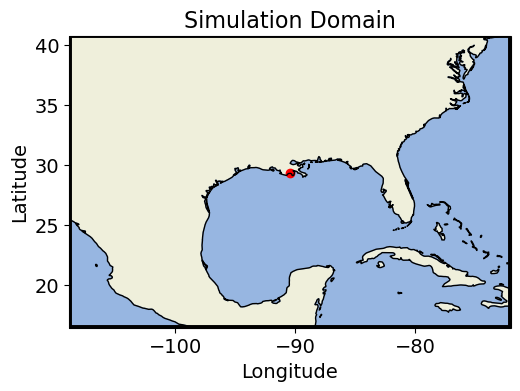

In [6]:
### Plot terrain
# Create figure and axes objects
fig = plt.figure(figsize=(8,4))
ax = plt.axes(projection=ccrs.PlateCarree())

# Bound and fill in nice lines # comment this out if your cartopy isn't working
ax.set_extent(MAP_BOUNDS1)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
ax.scatter([desired_lon], 
            [desired_lat], 
             color='r')

# Draw bounding box for inner domain
ax.plot((min_lon2, min_lon2), (min_lat2, max_lat2), lw=4, color='k')
ax.plot((max_lon2, max_lon2), (min_lat2, max_lat2), lw=4, color='k')
ax.plot((min_lon2, max_lon2), (min_lat2, min_lat2), lw=4, color='k')
ax.plot((min_lon2, max_lon2), (max_lat2, max_lat2), lw=4, color='k')

ax.plot((min_lon3, min_lon3), (min_lat3, max_lat3), lw=4, color='k')
ax.plot((max_lon3, max_lon3), (min_lat3, max_lat3), lw=4, color='k')
ax.plot((min_lon3, max_lon3), (min_lat3, min_lat3), lw=4, color='k')
ax.plot((min_lon3, max_lon3), (max_lat3, max_lat3), lw=4, color='k')

# Add important info to the plot
ax.set_title("Simulation Domain", fontsize=16)
ax.xaxis.set_visible(True)    # Set xaxis visible because cartopy hides it by default
ax.yaxis.set_visible(True)
ax.tick_params(labelsize=14)
ax.set_xlabel("Longitude", fontsize=14)
ax.set_ylabel("Latitude", fontsize=14)

# Adjust figure height so the xlabel isn't cut off when saved
plt.gcf().subplots_adjust(bottom=0.15)

plt.show()

In [6]:
# Plot an interesting variable for this case

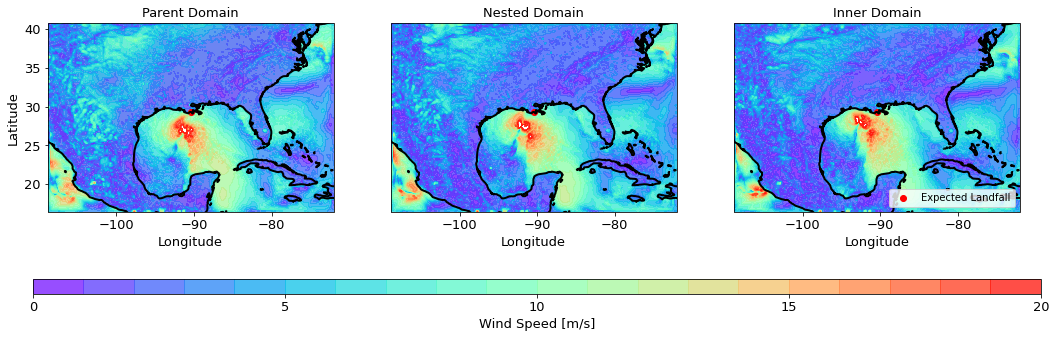

In [7]:
### Visualize variable of interest
## Set up the figure and axis, cartopy style
fig = plt.figure(figsize=(20,10))

# Left plot
ax1 = fig.add_subplot(1,3,1, projection=ccrs.PlateCarree())
ax1.coastlines(linewidth=2)
ax1.add_feature(cfeature.LAND)
ax1.set_extent(MAP_BOUNDS1)

# Right plot
ax2 = fig.add_subplot(1,3,2, projection=ccrs.PlateCarree())
ax2.coastlines(linewidth=2)
ax2.set_extent(MAP_BOUNDS2)

ax3 = fig.add_subplot(1,3,3, projection=ccrs.PlateCarree())
ax3.coastlines(linewidth=2)
ax3.set_extent(MAP_BOUNDS3)

## Set up colorbar values
clev = np.arange(0,60,2)
ticks = np.linspace(0,20,21)

# Filled-contour plots
im1 = ax1.contourf(longs1, lats1, sd_wsp.isel(Time=-1), ticks, cmap=plt.cm.rainbow,alpha=.75)
im2 = ax2.contourf(longs2, lats2, nd1_wsp.isel(Time=-1), ticks, cmap=plt.cm.rainbow,alpha=.8)
im3 = ax3.contourf(longs3, lats3, nd2_wsp.isel(Time=-1), ticks, cmap=plt.cm.rainbow,alpha=.8)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.115, 0.27, 0.7, 0.02])
cbar = fig.colorbar(im1, cax=cbar_ax, ticks=ticks, orientation="horizontal")
cbar.set_ticks([0,5,10,15,20])
cbar.set_label('Wind Speed [m/s]', fontsize=13)
cbar.ax.tick_params(labelsize=13)

ax1.xaxis.set_visible(True)
ax1.yaxis.set_visible(True)
ax1.tick_params(labelsize=13)
ax1.set_xlabel("Longitude", fontsize=13)
ax1.set_ylabel("Latitude", fontsize=13)
ax1.set_title("Parent Domain", fontsize=13)

ax2.xaxis.set_visible(True)
# ax2.yaxis.set_visible(True)
ax2.tick_params(labelsize=13)
ax2.set_xlabel("Longitude", fontsize=13)
# ax2.set_ylabel("Latitude", fontsize=13)
ax2.set_title("Nested Domain", fontsize=13)

ax3.xaxis.set_visible(True)
# ax2.yaxis.set_visible(True)
ax3.tick_params(labelsize=13)
ax3.set_xlabel("Longitude", fontsize=13)
# ax2.set_ylabel("Latitude", fontsize=13)
ax3.set_title("Inner Domain", fontsize=13)

ax1.scatter([desired_lon], 
            [desired_lat], 
             color='r')
ax2.scatter([desired_lon], 
            [desired_lat], 
             color='r')
ax3.scatter([desired_lon], 
            [desired_lat], 
             color='r',
             label='Expected Landfall')
ax3.legend(loc='lower right')
#plt.suptitle(pd.to_datetime(nd2_wsp['XTIME'].values[-1]).strftime('%Y-%m-%d %H:%M') + '                  ', fontsize=15)

plt.gcf().subplots_adjust(bottom=0.15)

plt.show()

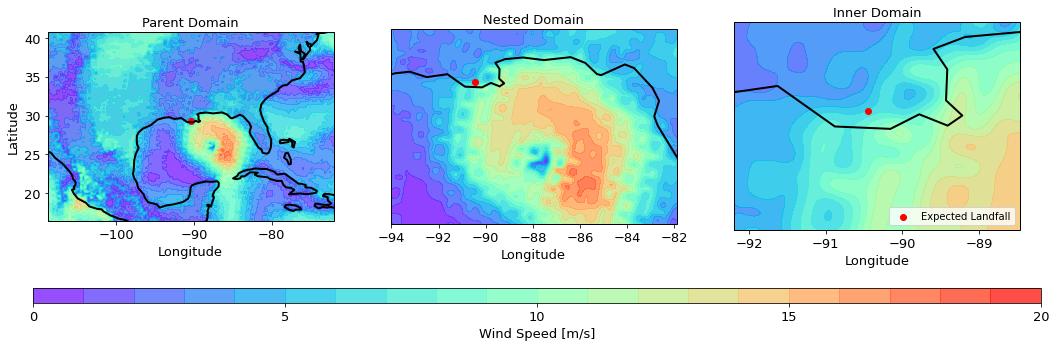

In [51]:
sd_sst = sd['SST']
nd1_sst = nd1['SST']
nd2_sst = nd2['SST']

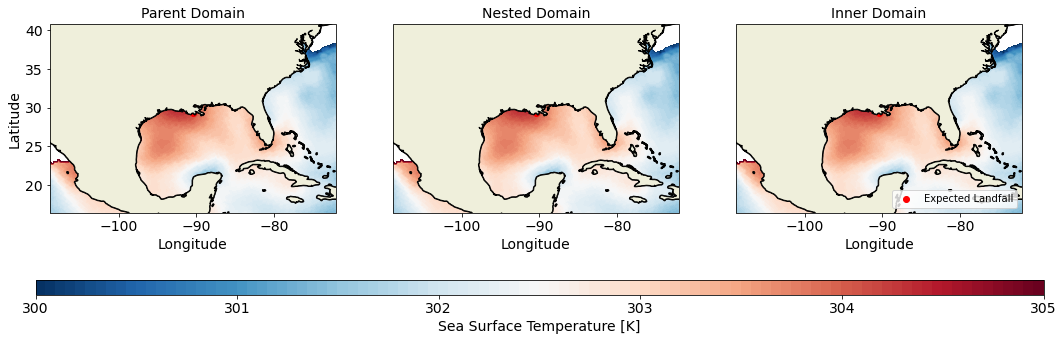

In [62]:
fig = plt.figure(figsize=(20,10))

# Left plot
ax1 = fig.add_subplot(1,3,1, projection=ccrs.PlateCarree())
ax1.coastlines(linewidth=2)
ax1.set_extent(MAP_BOUNDS1)

# Right plot
ax2 = fig.add_subplot(1,3,2, projection=ccrs.PlateCarree())
ax2.coastlines(linewidth=2)
ax2.set_extent(MAP_BOUNDS2)

ax3 = fig.add_subplot(1,3,3, projection=ccrs.PlateCarree())
ax3.coastlines(linewidth=2)
ax3.set_extent(MAP_BOUNDS3)

## Set up colorbar values
ticks = np.linspace(300,305,101)

# Filled-contour plots

im1 = ax1.contourf(longs1, lats1, sd_sst.isel(Time=-1), ticks, cmap=plt.cm.RdBu_r)
im2 = ax2.contourf(longs2, lats2, nd1_sst.isel(Time=-1), ticks, cmap=plt.cm.RdBu_r)
im3 = ax3.contourf(longs3, lats3, nd2_sst.isel(Time=-1), ticks, cmap=plt.cm.RdBu_r)

ax1.add_feature(cfeature.LAND, zorder=1, edgecolor='k')
ax2.add_feature(cfeature.LAND, zorder=1, edgecolor='k')
ax3.add_feature(cfeature.LAND, zorder=1, edgecolor='k')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.115, 0.27, 0.7, 0.02])
cbar = fig.colorbar(im1, cax=cbar_ax, ticks=ticks, orientation="horizontal")
cbar.set_ticks([300,301,302,303,304,305])
cbar.set_label('Sea Surface Temperature [K]', fontsize=14)
cbar.ax.tick_params(labelsize=14)

ax1.xaxis.set_visible(True)
ax1.yaxis.set_visible(True)
ax1.tick_params(labelsize=14)
ax1.set_xlabel("Longitude", fontsize=14)
ax1.set_ylabel("Latitude", fontsize=14)
ax1.set_title("Parent Domain", fontsize=14)

ax2.xaxis.set_visible(True)
# ax2.yaxis.set_visible(True)
ax2.tick_params(labelsize=14)
ax2.set_xlabel("Longitude", fontsize=14)
# ax2.set_ylabel("Latitude", fontsize=14)
ax2.set_title("Nested Domain", fontsize=14)

ax3.xaxis.set_visible(True)
# ax2.yaxis.set_visible(True)
ax3.tick_params(labelsize=14)
ax3.set_xlabel("Longitude", fontsize=14)
# ax2.set_ylabel("Latitude", fontsize=14)
ax3.set_title("Inner Domain", fontsize=14)

ax1.scatter([desired_lon], 
            [desired_lat], 
             color='r')
ax2.scatter([desired_lon], 
            [desired_lat], 
             color='r')
ax3.scatter([desired_lon], 
            [desired_lat], 
             color='r',
             label='Expected Landfall')
ax3.legend(loc='lower right')


plt.gcf().subplots_adjust(bottom=0.15)

plt.show()

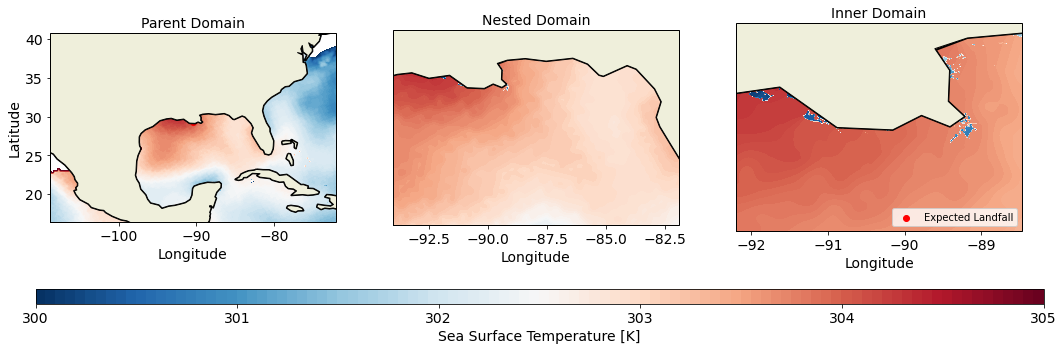

In [7]:
def wrf_unstagger( grid, dim ):
    """ Unstagger a staggered WRF grid in the X, Y, or Z (U, V, or W) direction.
        ---------------------
        grid (numpy.ndarray): The 2D, 3D, 4D, or 5D array to be unstaggered.
        dim (str): A string specifying what dimension to unstagger. Must be
        X, Y, Z, U, V or W.
        ---------------------
        returns:
        numpy.ndarray unstaggered grid (dim-1)
        ---------------------
        EXAMPLE:
        import numpy as np

        arr = np.random.randint( low=1, high=10, size=( 9,10,9 ) ) ## create a random array staggered in the Y direction
        arr_unstaggered = wrf_unstagger( arr, 'Y' )
        """
    nd = len( grid.shape )
    if dim == 'X' or dim == 'U':
        if nd == 4:
            gridout = ( grid[ :, :, :, :-1 ] + grid[ :, :, :, 1: ] ) / 2.
        else: pass
    if dim == 'Y' or dim == 'V':
        if nd == 4:
            gridout = ( grid[ :, :, :-1, : ] + grid[ :, :, 1:, : ] ) / 2.
        else: pass
    if dim == 'Z' or dim == 'W':
        if nd == 4:
            gridout = ( grid[ :, :-1, :, : ] + grid[ :, 1:, :, : ] ) / 2.
        else: pass
    return gridout



def wrf_pres(P,PB):
    return (P+PB) #in Pa

def wrf_height(PH,PHB):
    return (PH+PHB)/9.81

def wrf_theta(PTEMP):
    return (PTEMP+300.)

def wrf_temp(THETA,PRES):
    return (THETA)*(PRES/1000.)**(.2854) # in hPa


def wrf_rh(TEMP,PRES,MXRAT):
    A= 6.11*100. #Pa
    Rv = 461.495 #J/kg/K
    Lv = 2.453*10**6 #J/Kg
    
    ES = A*np.exp((Lv/Rv)*((1./273.)-(1./TEMP))) #in Pa
    SMXRAT = ((621.97*ES)/(PRES-ES))/1000.
    return (MXRAT/SMXRAT)*100.



def get_wrf_var(var,file_path):
    '''
    Requirements: 
    import netCDF4
    
    This function will read in a wrf file and the desired variable 
    The input is the variable name and the location of the file
    The output is an array of the desired variable in the native units
    example: get_wrf_var('PSFC','/location/to/file')    
    '''
    ncfile = netCDF4.Dataset(file_path,mode='r')
    ncvar = ncfile.variables[var][:]
    ncfile.close()
    return ncvar



def pres_interp(var,surface,new_height): 
    '''
    Takes a wrf variable like u,v,w, and/or mixing ratios and linearly interpolates it to pressure surfaces
    
    input: variable with 4D (time, height, x, y), the pressure surface as the same 4D variable, and the pressure
    levels that you want to interpolate to
    output: variable with 4D (time, new height, x, y)
    
    import numpy as np
    
    Note: np.interp requires the arrays to be increasing, so since we are interpolating to pressure coords
    we have to reverse the direction
    '''
    
    #######################
    #These are the pressure levels to interpolate to if you want to define them here
    #new_height = np.array([1000,850,700,500,200,100]) 
    #######################
    
    new_surf = np.empty((var.shape[0],new_height.shape[0],var.shape[2],var.shape[3]))

    for TIM in np.arange(var.shape[0]): #Loop over all the time periods
        for IDX, VAL in np.ndenumerate(var[0][0]): #Loop over all the points
            new_val = np.interp(new_height,surface[TIM,::-1,IDX[0],IDX[1]],var[TIM,::-1,IDX[0],IDX[1]], right=np.nan)
            new_surf[TIM,:,IDX[0],IDX[1]]=new_val[:] #put the interpolated profile into the new array
    return new_surf

In [20]:
################################################################
filename = "/projects/jiko1138/ATOC_3030/Project/Ida/wrfout_d01_2021-08-29_00:00:00"
filename = "/pl/active/courses/2021_fall/ATOC_NWP/students/jiko1138/ICA_12/05_04_04_01_06/wrfout_d01_2005-08-29_05:00:00"

ncfile = netCDF4.Dataset(filename,'r')

#Get the horizontal grid
LAT = ncfile.variables['XLAT'][:]
LON = ncfile.variables['XLONG'][:]

#Get Base Pressure, Perturbation Pressure, and combine them
P = ncfile.variables['P'][:]
PB = ncfile.variables['PB'][:]
PRES = wrf_pres(P,PB)/100. #Divide by 100 to get hPa

#Get perturbation potential temperature, add 300K, and convert to temperature
THETA = ncfile.variables['T'][:]
THETA = wrf_theta(THETA)
TEMP = wrf_temp(THETA,PRES)


#Get some variables
WVMIX = ncfile.variables['QVAPOR'][:]
U = ncfile.variables['U'][:]
V = ncfile.variables['V'][:]
W = ncfile.variables['W'][:]

#Because of the C-staggered grid in WRF we need to get the velocities centered at the mass points of the grid boxes
#We can do this by averaging the 2 closest grid points to get an estimate of the center
U = wrf_unstagger(U, 'X' )
V = wrf_unstagger(V, 'Y' )
#W = wrf_unstagger(W, 'Z' )


#Get the landmask
LM = ncfile.variables['LANDMASK'][:]


ncfile.close() #Close the file


#Can calculate other variables as needed
RH = wrf_rh(TEMP,PRES*100.,WVMIX) #Needs to be in Pascals instead of hPa


# Specify what pressure levels you want to interpolate to, Note that you will get NaNs near the surface of strong lows
PLevels = np.array([1000,850,700,500,200,100]) 


#Interpolate RH,U,V to those pressure levels
RH_ = pres_interp(RH,PRES,PLevels)
U_ = pres_interp(U,PRES,PLevels)
V_ = pres_interp(V,PRES,PLevels)

In [21]:
TIMES = get_wrf_var('Times',filename)
ncfile_times = xr.open_dataset("/pl/active/courses/2021_fall/ATOC_NWP/students/jiko1138/ICA_12/05_04_04_01_06/wrfout_d01_2005-08-29_05:00:00")
ncfile_times = np.sqrt(ncfile_times['U10']**2 + ncfile_times['V10']**2)

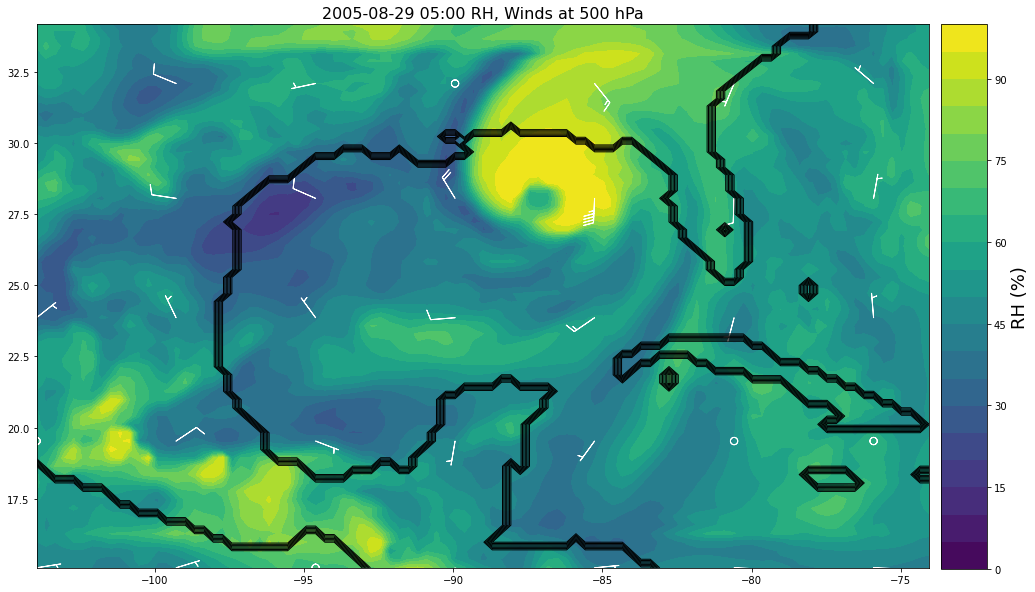

In [25]:
Time_Index = 0
Height_Index = 3

fig = plt.figure(figsize=(16,10))
ax = plt.subplot(111)

clev = np.arange(0,105,5) #Contour levels

#Plot the RH at the specified pressure level and time
im = ax.contourf(LON[Time_Index],LAT[Time_Index],RH_[Time_Index,Height_Index],clev,cmap=plt.cm.viridis)

#Add the landmask
ax.contour(LON[Time_Index],LAT[Time_Index],LM[Time_Index],colors='black',linewidths=1)

#For barbs you may need to fiddle with the sampling frequency depending on your resolution and plot size
xsf=15
ysf=15
ax.barbs(LON[Time_Index,::xsf,::ysf],LAT[Time_Index,::xsf,::ysf],U_[Time_Index,Height_Index,::xsf,::ysf],V_[Time_Index,Height_Index,::xsf,::ysf],color='white')

#Set the limits based on  min/max lat/lon. May need to modify for southern hemisphere and near the equator
ax.set_xlim(LON[Time_Index].min(),LON[Time_Index].max())
ax.set_ylim(LAT[Time_Index].min(),LAT[Time_Index].max())


#Add the title which will change based on the chosen Plevel
ax.set_title('%s RH, Winds at %s hPa'%(''.join(pd.to_datetime(ncfile_times['XTIME'].values[-1]).strftime('%Y-%m-%d %H:%M')),PLevels[Height_Index]),fontsize=16)

#Add the colorbar
cb_ax = fig.add_axes([.91,.124,.04,.756])
cbar = fig.colorbar(im,orientation='vertical',cax=cb_ax)
cbar.set_label('RH (%)',size=18)


#Save the figure

plt.show() #Show the plot

ValueError: 'x' values must be equally spaced

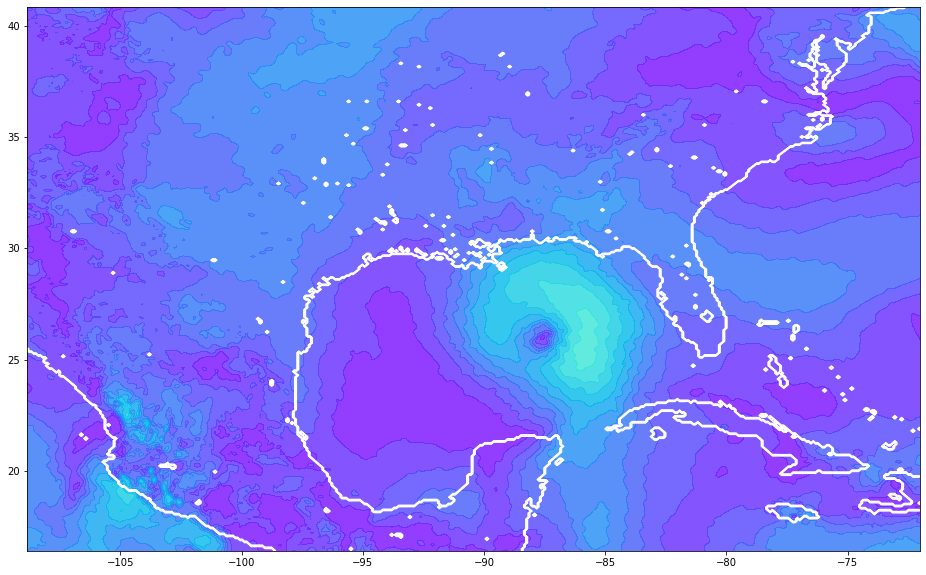

In [668]:
Time_Index = 0
Height_Index = 3


fig = plt.figure(figsize=(16,10))
ax = plt.subplot(111)

#Calculate the wind speed magnitudes
WSPD = np.sqrt(U**2 + V**2)

clev = np.arange(0,60,2) #Contour levels

#Plot the wind speeds at the specified pressure level and time
im = ax.contourf(LON[Time_Index],LAT[Time_Index],WSPD[Time_Index,Height_Index],clev,cmap=plt.cm.rainbow,alpha=.8)

#Add the landmask
ax.contour(LON[Time_Index],LAT[Time_Index],LM[Time_Index],colors='white',linewidths=1)


ax.streamplot(LON[Time_Index],LAT[Time_Index],U_[Time_Index,Height_Index],V_[Time_Index,Height_Index],color='k')
#More info on streamplots here: https://matplotlib.org/gallery/images_contours_and_fields/plot_streamplot.html

#Set the limits based on  min/max lat/lon. May need to modify for southern hemisphere and near the equator
ax.set_xlim(LON[Time_Index].min(),LON[Time_Index].max())
ax.set_ylim(LAT[Time_Index].min(),LAT[Time_Index].max())



#Add the title which will change based on the chosen Plevel
ax.set_title('%s Wind Speed, Streamlines at %s hPa'%(''.join(pd.to_datetime(nd2_wsp['XTIME'].values[-1]).strftime('%Y-%m-%d %H:%M')),PLevels[Height_Index]),fontsize=16)

#Add the colorbar
cb_ax = fig.add_axes([.91,.124,.04,.756])
cbar = fig.colorbar(im,orientation='vertical',cax=cb_ax)
cbar.set_label('Wind Speed (m s$^{-1}$)',size=18)


#Save the figure
plt.savefig('WRF_WSPD_STREAM_TI_%2.2d_PLEV_%2.2d.png'%(Time_Index,Height_Index),bbox_inches='tight')



plt.show()#Show the plot

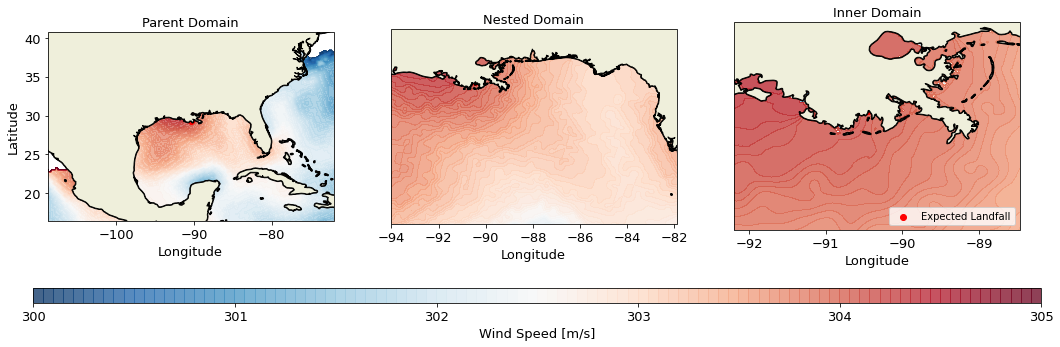

In [11]:
### Read in data
WRF_DIRECTORY = '/projects/jiko1138/ATOC_3030/'
DIR = 'Project'
sd = xr.open_dataset("/projects/jiko1138/ATOC_3030/Project/Ida/wrfout_d01_2021-08-29_00:00:00")
nd1 = xr.open_dataset("/projects/jiko1138/ATOC_3030/Project/Ida/wrfout_d02_2021-08-29_00:00:00")
nd2 = xr.open_dataset("/projects/jiko1138/ATOC_3030/Project/Ida/wrfout_d03_2021-08-29_00:00:00")
ncfile = WRF_DIRECTORY + DIR + "/geo_em.d01.nc"
nc_fid = Dataset(ncfile, 'r')
desired_lon = nc_fid.getncattr('CEN_LON')
desired_lat = nc_fid.getncattr('CEN_LAT')

### Useful data and parameters for plotting
## Pull lat/lon from the dataset
lats1 = sd['XLAT'].isel(Time=0)    # Note: we must index-select Time=0 because plots expect 2D data (lat-lon)
longs1 = sd['XLONG'].isel(Time=0)
lats2 = nd1['XLAT'].isel(Time=0)
longs2 = nd1['XLONG'].isel(Time=0)
lats3 = nd2['XLAT'].isel(Time=0)
longs3 = nd2['XLONG'].isel(Time=0)

## Extract min/max values if you chose to bound the size of the map
min_lat1 = lats1.values.min()
max_lat1 = lats1.values.max()
min_lon1 = longs1.values.min()
max_lon1 = longs1.values.max()
MAP_BOUNDS1 = [min_lon1, max_lon1, min_lat1, max_lat1-1.5]

min_lat2 = lats2.values.min()
max_lat2 = lats2.values.max()
min_lon2 = longs2.values.min()
max_lon2 = longs2.values.max()
MAP_BOUNDS2 = [min_lon2, max_lon2, min_lat2, max_lat2]

min_lat3 = lats3.values.min()
max_lat3 = lats3.values.max()
min_lon3 = longs3.values.min()
max_lon3 = longs3.values.max()
MAP_BOUNDS3 = [min_lon3, max_lon3, min_lat3, max_lat3]

## Calcualte wind speeds at 10m
sd_wsp = sd['SST']
nd1_wsp = nd1['SST']
nd2_wsp = nd2['SST']

### Visualize variable of interest
## Set up the figure and axis, cartopy style
fig = plt.figure(figsize=(20,10))

# Left plot
ax1 = fig.add_subplot(1,3,1, projection=ccrs.PlateCarree())
ax1.coastlines(linewidth=2)
ax1.add_feature(cfeature.LAND)
ax1.set_extent(MAP_BOUNDS1)

# Right plot
ax2 = fig.add_subplot(1,3,2, projection=ccrs.PlateCarree())
ax2.coastlines(linewidth=2)
ax2.set_extent(MAP_BOUNDS2)

ax3 = fig.add_subplot(1,3,3, projection=ccrs.PlateCarree())
ax3.coastlines(linewidth=2)
ax3.set_extent(MAP_BOUNDS3)

## Set up colorbar values
clev = np.arange(0,60,2)
ticks = np.linspace(300,305,101)

ax1.add_feature(cfeature.LAND, zorder=1, edgecolor='k')
ax2.add_feature(cfeature.LAND, zorder=1, edgecolor='k')
ax3.add_feature(cfeature.LAND, zorder=1, edgecolor='k')


# Filled-contour plots
im1 = ax1.contourf(longs1, lats1, sd_wsp.isel(Time=-1), ticks, cmap=plt.cm.RdBu_r,alpha=.75)
im2 = ax2.contourf(longs2, lats2, nd1_wsp.isel(Time=-1), ticks, cmap=plt.cm.RdBu_r,alpha=.8)
im3 = ax3.contourf(longs3, lats3, nd2_wsp.isel(Time=-1), ticks, cmap=plt.cm.RdBu_r,alpha=.8)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.115, 0.27, 0.7, 0.02])
cbar = fig.colorbar(im1, cax=cbar_ax, ticks=ticks, orientation="horizontal")
cbar.set_ticks([300,301,302,303,304,305])
cbar.set_label('Wind Speed [m/s]', fontsize=13)
cbar.ax.tick_params(labelsize=13)

ax1.xaxis.set_visible(True)
ax1.yaxis.set_visible(True)
ax1.tick_params(labelsize=13)
ax1.set_xlabel("Longitude", fontsize=13)
ax1.set_ylabel("Latitude", fontsize=13)
ax1.set_title("Parent Domain", fontsize=13)

ax2.xaxis.set_visible(True)
# ax2.yaxis.set_visible(True)
ax2.tick_params(labelsize=13)
ax2.set_xlabel("Longitude", fontsize=13)
# ax2.set_ylabel("Latitude", fontsize=13)
ax2.set_title("Nested Domain", fontsize=13)

ax3.xaxis.set_visible(True)
# ax2.yaxis.set_visible(True)
ax3.tick_params(labelsize=13)
ax3.set_xlabel("Longitude", fontsize=13)
# ax2.set_ylabel("Latitude", fontsize=13)
ax3.set_title("Inner Domain", fontsize=13)

ax1.scatter([desired_lon], 
            [desired_lat], 
             color='r')
ax2.scatter([desired_lon], 
            [desired_lat], 
             color='r')
ax3.scatter([desired_lon], 
            [desired_lat], 
             color='r',
             label='Expected Landfall')
ax3.legend(loc='lower right')
#plt.suptitle(pd.to_datetime(nd2_wsp['XTIME'].values[-1]).strftime('%Y-%m-%d %H:%M') + '                  ', fontsize=15)

plt.gcf().subplots_adjust(bottom=0.15)

plt.show()